In [1]:
#1_select_crop.py
#selecting type of crop

print('1- Oats')
print('2- Peas')
print('3- Wheat')
print('Please select a crop from the list given above:')
n=int(input())
print('The selected Number is:'+str(n))
crop=0
if(n==1):
    crop='Oats'
elif(n==2):
    crop='Peas'
elif(n==3):
    crop='Wheat'
else:
    crop='Invalid'
print('Selected crop is :'+' '+crop)

1- Oats
2- Peas
3- Wheat
Please select a crop from the list given above:
The selected Number is:2
Selected crop is : Peas


In [3]:
#2_parameters_of_wav_file.py

import wave
obj = wave.open('Z:/Siddharth/Drive/wav/crow distress.wav','rb')
print( "Number of channels=",obj.getnchannels())
print ( "Sample width=",obj.getsampwidth())
print ( "Frame rate=",obj.getframerate())
print ("Number of frames=",obj.getnframes())
print ( "parameters:",obj.getparams())
obj.close()

Number of channels= 2
Sample width= 2
Frame rate= 44100
Number of frames= 7526016
parameters: _wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=7526016, comptype='NONE', compname='not compressed')


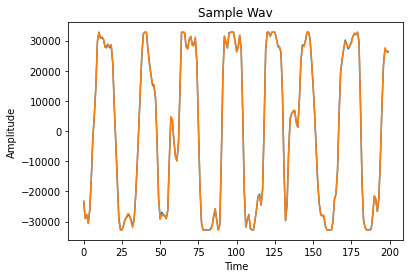

In [20]:
#3_display_audio_signal.py


from scipy.io.wavfile import read
import matplotlib.pyplot as plt


# read audio samples
input_data = read("Z:/Siddharth/Drive/wav/crow distress.wav")
audio = input_data[1]
# plot the first 1024 samples
plt.plot(audio[0:200])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
# display the plot
plt.show()

In [5]:
#4_convert_audioFile_toArray.py

import wave
import numpy as np

# Read file to get buffer                                                                                               
ifile = wave.open("Z:/Siddharth/Drive/wav/crow distress.wav")
samples = ifile.getnframes()
audio = ifile.readframes(samples)

# Convert buffer to float32 using NumPy                                                                                 
audio_as_np_int16 = np.frombuffer(audio, dtype=np.int8)
audio_as_np_float32 = audio_as_np_int16.astype(np.float32)

# Normalise float32 array so that values are between -1.0 and +1.0                                                      
max_int16 = 2**15
audio_normalised = audio_as_np_float32 / max_int16
print(audio_normalised)

[-0.00140381 -0.00280762  0.00143433 ...  0.00283813 -0.00192261
  0.00283813]


[ 0.          0.         -0.00085449 ...  0.          0.
  0.        ]
[-0.00387573 -0.00387573 -0.00390625 ...  0.00375366  0.00375366
  0.00375366]
[[1. 1.]
 [1. 1.]]


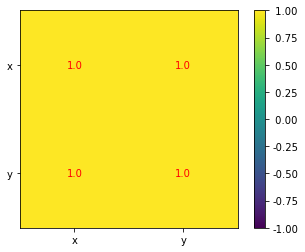

In [11]:
#5_heatmap_selfCorrelation.py

import wave
import numpy as np
import matplotlib.pyplot as plt

# Read file to get buffer                                                                                               
ifile1 = wave.open('Z:/Siddharth/Drive/wav/crow 3.wav')
samples1 = ifile1.getnframes()
audio1 = ifile1.readframes(samples1)

ifile = wave.open('Z:/Siddharth/Drive/wav/crow 1.wav')
samples = ifile.getnframes()
audio = ifile.readframes(samples)

# Convert buffer to float32 using NumPy                                                                                 
audio_as_np_int16 = np.frombuffer(audio1, dtype=np.int8)
audio_as_np_float32 = audio_as_np_int16.astype(np.float32)

audio_as_np_int16x = np.frombuffer(audio, dtype=np.int8)
audio_as_np_float32x = audio_as_np_int16x.astype(np.float32)


# Normalise float32 array so that values are between -1.0 and +1.0                                                      
max_int16 = 2**15

audio_normalised = audio_as_np_float32 / max_int16
print(audio_normalised)

audio_normalised1= audio_as_np_float32x / max_int16
print(audio_normalised1)

corr_matrix = np.corrcoef(audio_normalised,audio_normalised).round(decimals=2)
print(corr_matrix)


#to plot heatmap of correlation

fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x','y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x','y'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

[-0.00387573 -0.00387573 -0.00390625 ...  0.00375366  0.00375366
  0.00375366]
[0. 0. 0. ... 0. 0. 0.]
[[1.00e+00 3.74e-04]
 [3.74e-04 1.00e+00]]


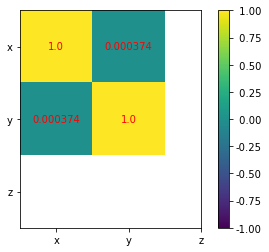

In [30]:
#6_correlation.py

import wave
import numpy as np
import matplotlib.pyplot as plt

def corr2_coeff(A, B):
    # Rowwise mean of input arrays & subtract from input arrays themeselves
    A_mA = A - A.mean(1)[:, None]
    B_mB = B - B.mean(1)[:, None]

    # Sum of squares across rows
    ssA = (A_mA**2).sum(1)
    ssB = (B_mB**2).sum(1)

    # Finally get corr coeff
    return np.dot(A_mA, B_mB.T) / np.sqrt(np.dot(ssA[:, None],ssB[None]))

# Read file to get buffer for audio 1                                                                                            
ifile = wave.open('Z:/Siddharth/Drive/wav/crow 1.wav')
ifile1 = wave.open('Z:/Siddharth/Drive/wav/pigeon 1.wav')

samples = ifile.getnframes()
samples1 = ifile1.getnframes()

audio = ifile.readframes(samples)
audio1 = ifile1.readframes(samples1)

# Convert buffer to float32 using NumPy                                                                                 
audio_as_np_int16 = np.frombuffer(audio, dtype=np.int8)
audio_as_np_int16_1 = np.frombuffer(audio1, dtype=np.int8)

audio_as_np_float32 = audio_as_np_int16.astype(np.float32)
audio_as_np_float32_1 = audio_as_np_int16_1.astype(np.float32)

# Normalise float32 array so that values are between -1.0 and +1.0                                                      
max_int16 = 2**15

audio_normalised = audio_as_np_float32 / max_int16
audio_normalised_1 = audio_as_np_float32_1 / max_int16

print(audio_normalised)
print(audio_normalised_1)

audio_normalised_1.resize(audio_normalised.size)
corr_matrix = np.corrcoef(audio_normalised, audio_normalised_1).round(decimals=7)
print(corr_matrix)

#to plot heatmap of correlation

fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.set_ylim(2.5, -0.5)
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix[0])):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

* recording
* done recording
Audio recorded
[ 0.          0.         -0.00085449 ...  0.          0.
  0.        ]
[ 0.          0.          0.         ... -0.00015259 -0.00183105
 -0.00015259]
[[ 1.000e+00 -7.712e-04]
 [-7.712e-04  1.000e+00]]


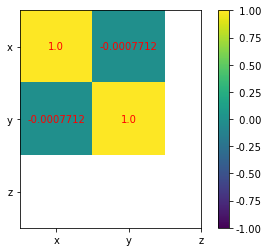

In [1]:
#final

import wave
import pyaudio
import numpy as np
import matplotlib.pyplot as plt

import sounddevice as sd
from scipy.io.wavfile import write

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
RECORD_SECONDS = 3
WAVE_OUTPUT_FILENAME = "Z:/Siddharth/Drive/wav/3.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()


print('Audio recorded')
# Read file to get buffer for audio 1                                                                                            
ifile = wave.open('Z:/Siddharth/Drive/wav/crow 3.wav')
ifile1 = wave.open('Z:/Siddharth/Drive/wav/3.wav')

samples = ifile.getnframes()
samples1 = ifile1.getnframes()

audio = ifile.readframes(samples)
audio1 = ifile1.readframes(samples1)

# Convert buffer to float32 using NumPy                                                                                 
audio_as_np_int16 = np.frombuffer(audio, dtype=np.int8)
audio_as_np_int16_1 = np.frombuffer(audio1, dtype=np.int8)

audio_as_np_float32 = audio_as_np_int16.astype(np.float32)
audio_as_np_float32_1 = audio_as_np_int16_1.astype(np.float32)

# Normalise float32 array so that values are between -1.0 and +1.0                                                      
max_int16 = 2**15

audio_normalised = audio_as_np_float32 / max_int16
audio_normalised_1 = audio_as_np_float32_1 / max_int16

print(audio_normalised)
print(audio_normalised_1)

audio_normalised.resize(audio_normalised_1.size)
corr_matrix = np.corrcoef(audio_normalised, audio_normalised_1).round(decimals=7)
print(corr_matrix)

#to plot heatmap of correlation
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.set_ylim(2.5, -0.5)
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix[0])):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()